<a href="https://colab.research.google.com/github/sngalamou/angulas_sn/blob/master/USML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving team_stats_2003_2023.csv to team_stats_2003_2023 (1).csv
No NaNs found.
No infs found.
No NaNs found.
No infs found.


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


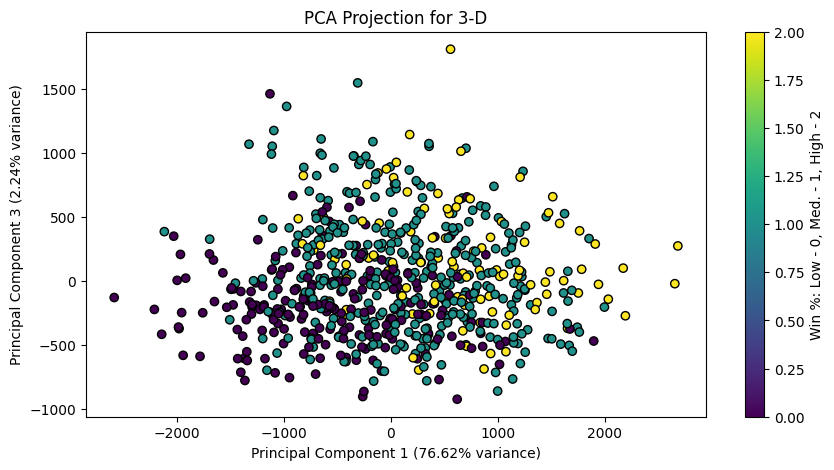

No NaNs found.
No infs found.


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


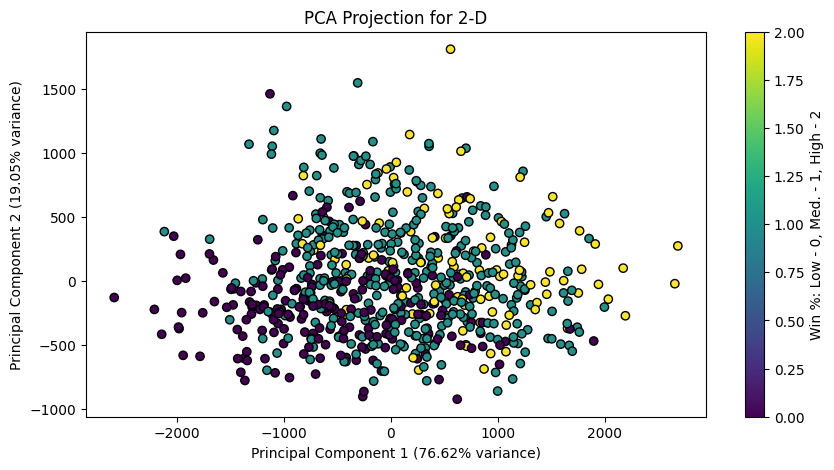

No NaNs found.
No infs found.


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


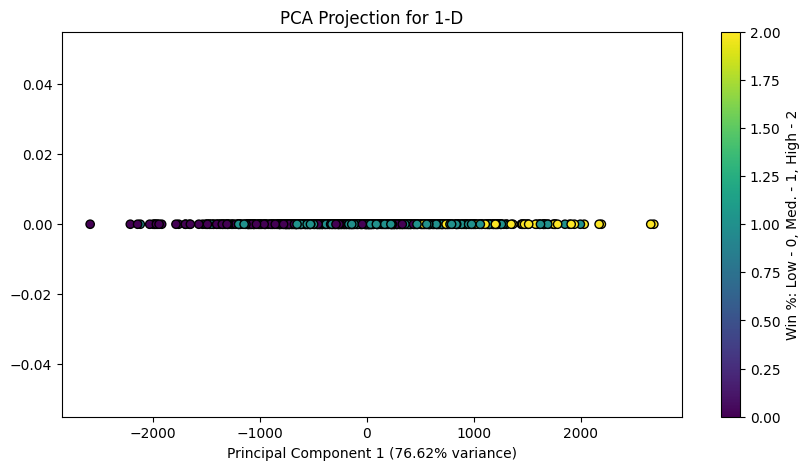

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6856: ComplexWarning: Casting complex values to real discards the imaginary part
  tops = np.array(tops, float)  # causes problems later if it's an int
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6857: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


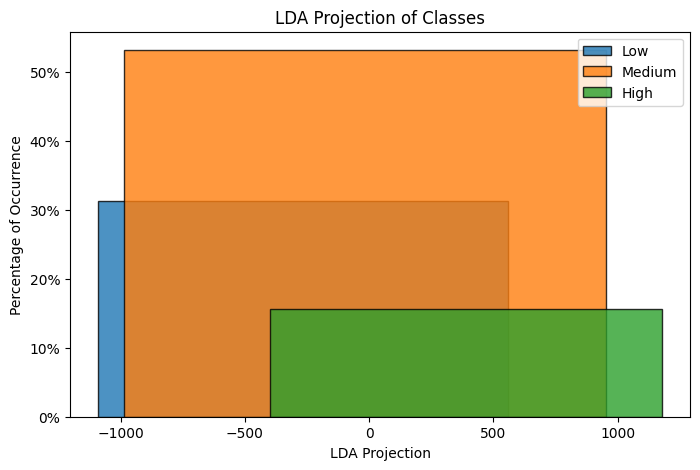

In [2]:
# This is the python notebook for Week 2 Unsupervised Machine Learning Assignment 2
# The dataset used is linked here https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023

# There are two goals of this assignment:
# 1. To apply PCA to this dataset
# 2. To apply LDA to this dataset

# The goal is to use these techniques to train a model to be able to predict which teams will have the best records in the regular season and post-season

# First I must analyze the dataset and it's features, then apply LDA (1-D) or PCA (1-D - 3-D) to it.
# I will apply PCA first, then LDA second.

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
import numpy as np

# If you are NOT using google colab, you need to take this part out starting from here
from google.colab import files

uploaded = files.upload()
# till here

# Load the CSV data
df = pd.read_csv('team_stats_2003_2023.csv')

team_names = df.iloc[:, 1].values

labels = df.iloc[:, 4].values  # Extract labels from column 5
labels = np.array(labels)


# Define bins (e.g., low, medium, high performance)
bins = [0, 0.4, 0.7, 1.0]
labels = [0, 1, 2]  # 0 = low, 1 = medium, 2 = high
df['performance_category'] = pd.cut(df['win_loss_perc'], bins=bins, labels=labels).fillna(0)
performance_labels = df['performance_category'].values  # Use the binned categories as labels

# Drop columns 'win_loss_perc', 'team', and 'performance_category' for data
data = df.drop(columns=['win_loss_perc', 'team', 'performance_category'])
data = data.fillna(0)

class_label_mapping = {
    0: 'Low',
    1: 'Medium',
    2: 'High'
}

def check_data_for_nans_and_infs(data):
  nan_cols = data.columns[data.isna().any()].tolist()
  inf_cols = data.columns[np.isinf(data).any()].tolist()
  if nan_cols: print("Columns with NaNs:", nan_cols)
  else: print("No NaNs found.")
  if inf_cols: print("Columns with infs:", inf_cols)
  else: print("No infs found.")

check_data_for_nans_and_infs(data)

def lda(data, labels):
    # Separate data by class
    X1 = data[labels == 1]
    X2 = data[labels == 2]
    X3 = data[labels == 3]

    # Compute class means and overall mean
    mu1 = np.mean(X1, axis=0)
    mu2 = np.mean(X2, axis=0)
    mu3 = np.mean(X3, axis=0)
    mu = np.mean(data, axis=0)

    # Compute within-class scatter matrices
    S1 = np.cov(X1, rowvar=False)
    S2 = np.cov(X2, rowvar=False)
    S3 = np.cov(X3, rowvar=False)
    Sw = S1 + S2 + S3

    # Compute between-class scatter matrix
    Sb = np.outer((mu1 - mu2 - mu3), (mu1 - mu2 - mu3))

    # Calculate the LDA projection vector
    invSw = np.linalg.inv(Sw)
    invSwSb = np.dot(invSw, Sb)
    eigenvalues, eigenvectors = np.linalg.eig(invSwSb)
    w = eigenvectors[:, np.argmax(eigenvalues)]  # Leading eigenvector for max separability
    d, v = np.linalg.eig(invSwSb)
    w = v[:, np.argmax(d)]  # Leading eigenvector for max separability

    # Project data onto the LDA vector
    y1 = np.dot(X1, w)
    y2 = np.dot(X2, w)
    y3 = np.dot(X3, w)

    return y1, y2, y3, w


def pca(data, num_components):
  check_data_for_nans_and_infs(data)
  data_centered = data - np.mean(data, axis=0)

  covariance_matrix = np.cov(data_centered, rowvar=False)

  eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  eigenvectors = eigenvectors[:, sorted_indices]

  explained_variance = eigenvalues
  total_variance = np.sum(eigenvalues)
  explained_variance_ratio = explained_variance / total_variance

  principal_components = eigenvectors[:, :num_components]
  explained_variance_ratio = explained_variance_ratio[:num_components]

  projected_data = np.dot(data_centered, principal_components)

  return projected_data, principal_components, explained_variance_ratio

def calc_variance(projected_data, principal_components):
  return (np.var(projected_data, axis=0)) / (np.sum(np.var(projected_data, axis=0))) * 100

# Function to compute mean vector
def compute_mean(X):
    return np.mean(X, axis=0)

# Function to compute within-class scatter matrix
def compute_within_class_scatter(X, mean):
    scatter = np.zeros((X.shape[1], X.shape[1]))
    for i in range(X.shape[0]):
        diff = (X[i, :] - mean).reshape(-1, 1)
        scatter += diff @ diff.T
    return scatter

def calc_lda(Data, Labels):
    """
    Perform Linear Discriminant Analysis (LDA) for three classes.

    Parameters:
    - Data: NumPy array of shape (N, D), where N is the number of samples and D is the number of features.
    - Labels: NumPy array of shape (N,), containing class labels (should be three unique labels).

    Returns:
    - y1, y2, y3: Projected data for each class.
    - w: Projection vector.
    """
    # Ensure Data and Labels are NumPy arrays
    Data = np.asarray(Data)
    Labels = np.asarray(Labels)

    # Get unique classes
    classes = np.unique(Labels)

    # Check that there are exactly three classes
    if len(classes) != 3:
        raise ValueError("This function requires exactly three classes.")

    # Separate data by class
    X1 = Data[Labels == classes[0], :]
    X2 = Data[Labels == classes[1], :]
    X3 = Data[Labels == classes[2], :]

    # Compute class means and overall mean
    mu1 = np.mean(X1, axis=0).reshape(-1, 1)
    mu2 = np.mean(X2, axis=0).reshape(-1, 1)
    mu3 = np.mean(X3, axis=0).reshape(-1, 1)
    mu = np.mean(Data, axis=0).reshape(-1, 1)

    # Compute within-class scatter matrix
    S1 = np.cov(X1, rowvar=False) * (X1.shape[0] - 1)
    S2 = np.cov(X2, rowvar=False) * (X2.shape[0] - 1)
    S3 = np.cov(X3, rowvar=False) * (X3.shape[0] - 1)
    Sw = S1 + S2 + S3

    # Compute between-class scatter matrix
    n1 = X1.shape[0]
    n2 = X2.shape[0]
    n3 = X3.shape[0]
    Sb = n1 * (mu1 - mu) @ (mu1 - mu).T + \
         n2 * (mu2 - mu) @ (mu2 - mu).T + \
         n3 * (mu3 - mu) @ (mu3 - mu).T

    # Solve the generalized eigenvalue problem
    eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(Sw) @ Sb)

    # Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigvals)[::-1]
    w = eigvecs[:, sorted_indices[0]]  # Take the eigenvector with the largest eigenvalue

    # Normalize the projection vector
    w = w / np.linalg.norm(w)

    # Project data onto the LDA vector
    y1 = X1 @ w
    y2 = X2 @ w
    y3 = X3 @ w

    return y1, y2, y3, w

if __name__ == '__main__':
  num_components = 3 #for 3-D

  # Perform PCA and plot for 3D, 2D, and 1D cases

  # 3D PCA Projection (3 Components)
  num_components = 3
  projected_data_pca, principal_components, explained_variance_ratio = pca(data, num_components)
  pca_data = projected_data_pca

  # Plot PCA Projection for 3D
  plt.figure(figsize=(10, 5))
  plt.scatter(projected_data_pca[:, 0], projected_data_pca[:, 1], c=performance_labels, cmap='viridis', edgecolor='k')
  plt.title('PCA Projection for 3-D')
  plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0].real * 100:.2f}% variance)')
  plt.ylabel(f'Principal Component 3 ({explained_variance_ratio[2].real * 100:.2f}% variance)')
  plt.colorbar(label='Win %: Low - 0, Med. - 1, High - 2')
  plt.show()

  # 2D PCA Projection (2 Components)
  num_components = 2
  projected_data_pca, principal_components, explained_variance_ratio = pca(data, num_components)

  # Plot PCA Projection for 2D
  plt.figure(figsize=(10, 5))
  plt.scatter(projected_data_pca[:, 0], projected_data_pca[:, 1], c=performance_labels, cmap='viridis', edgecolor='k')
  plt.title('PCA Projection for 2-D')
  plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0].real * 100:.2f}% variance)')
  plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1].real * 100:.2f}% variance)')
  plt.colorbar(label='Win %: Low - 0, Med. - 1, High - 2')
  plt.show()

  # 1D PCA Projection (1 Component)
  num_components = 1
  projected_data_pca, principal_components, explained_variance_ratio = pca(data, num_components)

  # Plot PCA Projection for 1D
  plt.figure(figsize=(10, 5))
  plt.scatter(projected_data_pca, np.zeros_like(projected_data_pca), c=performance_labels, cmap='viridis', edgecolor='k')
  plt.title('PCA Projection for 1-D')
  plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0].real * 100:.2f}% variance)')
  plt.ylabel('')
  plt.colorbar(label='Win %: Low - 0, Med. - 1, High - 2')
  plt.show()

  # Perform LDA
  projected_data_pca = pca_data #Used the PCA data from the 3-D PCA Plot
  y1, y2, y3, w  = calc_lda(projected_data_pca, performance_labels)
  lda_components = w
  projected_data_lda = projected_data_pca @ lda_components

  # Plot LDA Projection
  plt.figure(figsize=(8, 5))
  unique_classes = np.unique(performance_labels)
for c in unique_classes:
    class_name = class_label_mapping.get(c, f'Class {c}')
    data_c = projected_data_lda[performance_labels == c]
    plt.hist(
        data_c,
        alpha=0.8,
        bins=1,
        label=class_name,
        weights=np.ones_like(data_c) / len(projected_data_lda),
        edgecolor='black'
    )
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.xlabel('LDA Projection')
plt.ylabel('Percentage of Occurrence')
plt.legend()
plt.title('LDA Projection of Classes')
plt.show()
